## Pymaceuticals Inc.

### Analysis

In [166]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the data table for preview


In [167]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [168]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [169]:
# Combine the data into a single DataFrame
mouse_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


#Display the combined dataframe
mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [170]:
unique_mice_ids = mouse_results["Mouse ID"].unique()
number_of_mice = len(unique_mice_ids)
number_of_mice

249

In [171]:
mouse_results["Timepoint"].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [172]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_id = mouse_results.loc[mouse_results.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [173]:
#Get all the data for the duplicate mouse ID.

duplicate_data = mouse_results.loc[mouse_results["Mouse ID"] == 'g989', :]

duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [174]:
# Create a clean dataframe by dropping the duplicate mouse by it's ID
clean_df = mouse_results[mouse_results['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [175]:
#Checking the number of mice in the clean dataframe

len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [183]:
# Mean of the tumor volume

grouped_by_drug = clean_df.groupby(["Drug Regimen"])

mean = grouped_by_drug['Tumor Volume (mm3)'].mean()

median = grouped_by_drug['Tumor Volume (mm3)'].median()

variance = grouped_by_drug['Tumor Volume (mm3)'].var()

std_dev = grouped_by_drug['Tumor Volume (mm3)'].std()

sem = grouped_by_drug['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({"Tumor Volume Mean": mean,
                             "Tumor Volume Median": median,
                             "Tumor Volume Variance": variance,
                             "Tumor Volume Standard Deviation": std_dev,
                             "Standard Error of the Mean": sem})

summary_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

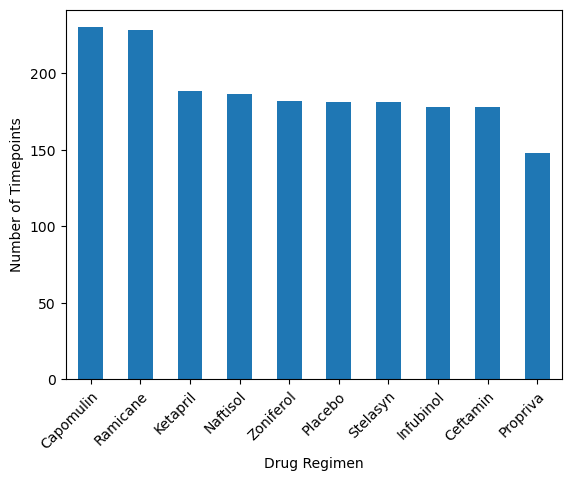

In [194]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

total_rows = clean_df['Drug Regimen'].value_counts()
total_rows

figure1 = total_rows.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Timepoints")

xticklabels = total_rows.index

figure1.set_xticklabels(xticklabels, rotation=45, wrap=True, ha="right", rotation_mode="anchor")

plt.show()


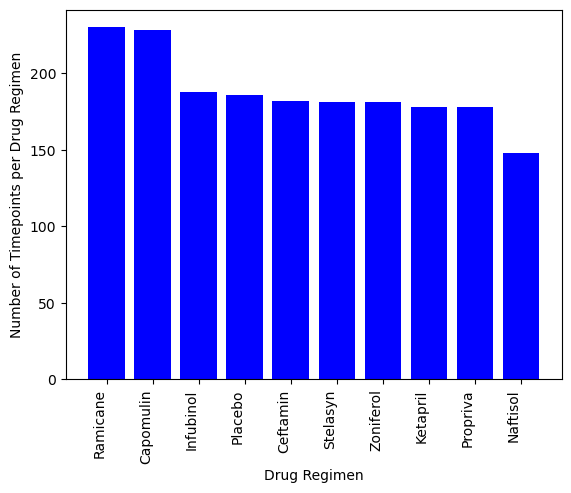

In [197]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = clean_df["Drug Regimen"].unique()

y_axis = clean_df['Drug Regimen'].value_counts()

plt.bar(x_axis, y_axis, color="blue", align="center")

plt.xlabel("Drug Regimen")

plt.ylabel("Number of Timepoints per Drug Regimen")

plt.xticks(rotation=90, ha='right')



plt.show()

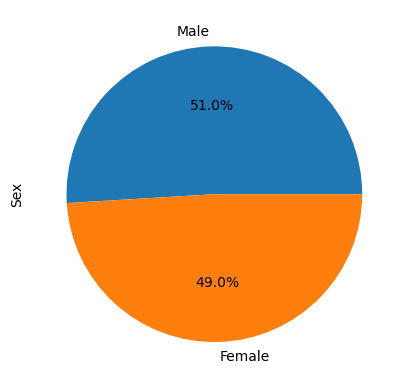

In [209]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_of_mice = clean_df["Sex"].value_counts()

sex_of_mice.plot(kind="pie", autopct="%1.1f%%", label="Sex")

plt.show()


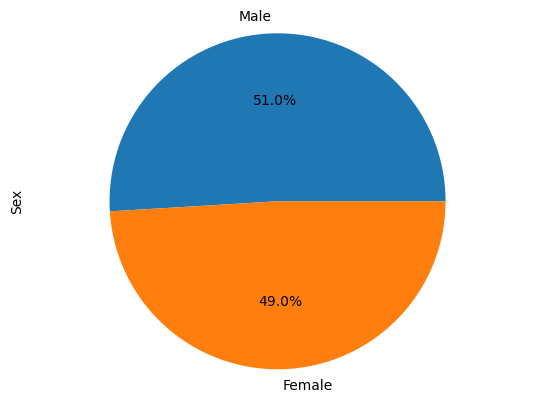

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male","Female"]

sizes = clean_df["Sex"].value_counts()

plt.pie(sizes, labels=labels, autopct="%1.1f%%")

plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [226]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint





